Ans 1 -

Win records (percentage win and total wins) for each team by year and gender,
excluding ties, matches with no result, and matches decided by the DLS method in the event that, for whatever
reason, the planned innings can’t be completed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
with open('/content/gdrive/MyDrive/match_results.json') as file:
  match_data = json.load(file)

#loading match results data

In [4]:
match_df = pd.DataFrame(match_data) #converting data to dataframe

In [5]:
match_df.head()

,city,dates,gender,match_type,outcome.runs,outcome.winner,overs,player_of_match,teams,toss.decision,...,ICC.World.XI,Sri.Lanka,supersubs.South.Africa,India,England,supersubs.Pakistan,Australia,Pakistan,supersubs.West.Indies,Bangladesh
0,Brisbane,2017-01-13,male,ODI,92.0,Australia,50,MS Wade,Australia,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brisbane,2017-01-13,male,ODI,92.0,Australia,50,MS Wade,Pakistan,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-01-15,male,ODI,NaN,Pakistan,50,Mohammad Hafeez,Australia,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-01-15,male,ODI,NaN,Pakistan,50,Mohammad Hafeez,Pakistan,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Perth,2017-01-19,male,ODI,NaN,Australia,50,SPD Smith,Australia,field,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
match_df.columns

Index(['city', 'dates', 'gender', 'match_type', 'outcome.runs',
       'outcome.winner', 'overs', 'player_of_match', 'teams', 'toss.decision',
       'toss.winner', 'umpires', 'venue', 'matchid', 'outcome.wickets',
       'result', 'outcome.method', 'neutral_venue', 'match_type_number',
       'outcome.result', 'outcome.eliminator', 'supersubs.Australia',
       'supersubs.England', 'supersubs.Africa.XI', 'supersubs.Asia.XI',
       'Zimbabwe', 'supersubs.Sri.Lanka', 'supersubs.Bangladesh',
       'supersubs.Zimbabwe', 'supersubs.New.Zealand', 'supersubs.India',
       'supersubs.ICC.World.XI', 'ICC.World.XI', 'Sri.Lanka',
       'supersubs.South.Africa', 'India', 'England', 'supersubs.Pakistan',
       'Australia', 'Pakistan', 'supersubs.West.Indies', 'Bangladesh'],
      dtype='object')

In [7]:
no_result_matchids = match_df[match_df['result'] == 'no result']['matchid']

In [8]:
no_result_matchids_list = no_result_matchids.tolist() #keeping a list of matches that ended in 'no result' for Q.2

In [9]:
match_df['outcome.method'].value_counts()

D/L    376
Name: outcome.method, dtype: int64

In [10]:
match_df = match_df[match_df['outcome.method'] != 'D/L'] #removing matches that were decided by D/L method

In [11]:
match_df['result'].value_counts()

no result    158
tie           30
Name: result, dtype: int64

In [12]:
match_df = match_df[match_df['result'] != 'no result'] #removing matches that had no result

In [13]:
match_df = match_df[match_df['result'] != 'tie'] #removing matches that ended in a tie

In [14]:
match_df['year'] = pd.to_datetime(match_df['dates']).dt.year #adding a year column to the dataframe by extracting it from the dates column

In [15]:
match_df.head()

,city,dates,gender,match_type,outcome.runs,outcome.winner,overs,player_of_match,teams,toss.decision,...,Sri.Lanka,supersubs.South.Africa,India,England,supersubs.Pakistan,Australia,Pakistan,supersubs.West.Indies,Bangladesh,year
0,Brisbane,2017-01-13,male,ODI,92.0,Australia,50,MS Wade,Australia,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
1,Brisbane,2017-01-13,male,ODI,92.0,Australia,50,MS Wade,Pakistan,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
2,NaN,2017-01-15,male,ODI,NaN,Pakistan,50,Mohammad Hafeez,Australia,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
3,NaN,2017-01-15,male,ODI,NaN,Pakistan,50,Mohammad Hafeez,Pakistan,bat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
4,Perth,2017-01-19,male,ODI,NaN,Australia,50,SPD Smith,Australia,field,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [16]:
# counting total matches each team played per year and gender
total_matches = match_df.groupby(['teams', 'year', 'gender']).size().reset_index(name='total_matches')

# count total matches each team won per year and gender
wins = match_df[match_df['outcome.winner'] == match_df['teams']].groupby(['teams', 'year', 'gender']).size().reset_index(name='wins')

# merge the two dataframes
win_records = pd.merge(total_matches, wins, how='left', on=['teams', 'year', 'gender'])

# calculate win percentage
win_records['win_percentage'] = (win_records['wins'] / win_records['total_matches']) * 100

win_records = win_records.fillna(0)  # replacing NaN values with 0 (for teams that didn't win any match)


In [17]:
win_records.head() #This dataframe contains the win records (percentage win and total wins) for each team by year and gender.

,teams,year,gender,total_matches,wins,win_percentage
0,Afghanistan,2009,male,1,1.0,100.000000
1,Afghanistan,2010,male,2,1.0,50.000000
2,Afghanistan,2012,male,4,0.0,0.000000
3,Afghanistan,2014,male,10,4.0,40.000000
4,Afghanistan,2015,male,13,7.0,53.846154


In [18]:
# filtering data for year 2019
df_2019 = win_records[win_records['year'] == 2019]

# calculating the teams with highest win percentage for male and female
highest_win_percent_male = df_2019[df_2019['gender'] == 'male']['win_percentage'].idxmax()
highest_win_percent_female = df_2019[df_2019['gender'] == 'female']['win_percentage'].idxmax()

# calculate the teams with highest total wins for male and female
highest_wins_male = df_2019[df_2019['gender'] == 'male']['wins'].idxmax()
highest_wins_female = df_2019[df_2019['gender'] == 'female']['wins'].idxmax()

# print the teams
print("Male team with highest win percentage in 2019:", df_2019.loc[highest_win_percent_male, 'teams'])
print("Female team with highest win percentage in 2019:", df_2019.loc[highest_win_percent_female, 'teams'])
print("Male team with highest total wins in 2019:", df_2019.loc[highest_wins_male, 'teams'])
print("Female team with highest total wins in 2019:", df_2019.loc[highest_wins_female, 'teams'])


Male team with highest win percentage in 2019: Netherlands
Female team with highest win percentage in 2019: Australia
Male team with highest total wins in 2019: Australia
Female team with highest total wins in 2019: Australia


In [19]:
df_2019

,teams,year,gender,total_matches,wins,win_percentage
8,Afghanistan,2019,male,16,3.0,18.750000
38,Australia,2019,female,10,10.0,100.000000
39,Australia,2019,male,23,16.0,69.565217
62,Bangladesh,2019,male,17,6.0,35.294118
98,England,2019,female,11,6.0,54.545455
99,England,2019,male,20,14.0,70.000000
134,India,2019,female,11,9.0,81.818182
135,India,2019,male,23,15.0,65.217391
157,Ireland,2019,male,13,6.0,46.153846
169,Namibia,2019,male,4,3.0,75.000000


The male teams with the highest win percentages and those with the highest total wins are not the same. This is because of the differences in the number of matches played by each team. A team might have a high win percentage but fewer total wins if it played fewer matches. Conversely, a team might have more total wins but a lower win percentage if it played a large number of matches and lost a significant portion of them. The Netherlands male team has a higher win percentage because they won the only game they played in 2019. The Australian male team played 23 games and won 16 of them. For the female team, the highest no.of wins as well as the highest win percentage belongs to the Australian team who won all of the 10 games they played in 2019.

Ans 2 -

In [20]:
with open('/content/gdrive/MyDrive/innings_results.json') as file:
  innings_data = json.load(file) #loading the innings descripton data

In [21]:
innings_df = pd.DataFrame(innings_data) #converting data to dataframe

In [22]:
innings_df

,batsman,bowler,non_striker,runs.batsman,runs.extras,runs.total,over,team,innings,matchid,...,replacements.match.in,replacements.match.out,replacements.match.team,replacements.match.reason,replacements.match.in.1,replacements.match.out.1,replacements.match.reason.1,replacements.match.team.1,extras.penalty,extras.wides
0,DA Warner,Mohammad Amir,TM Head,0,0,0,0.1,Australia,1,1000887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DA Warner,Mohammad Amir,TM Head,0,0,0,0.2,Australia,1,1000887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DA Warner,Mohammad Amir,TM Head,0,0,0,0.3,Australia,1,1000887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DA Warner,Mohammad Amir,TM Head,0,0,0,0.4,Australia,1,1000887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DA Warner,Mohammad Amir,TM Head,0,1,1,0.5,Australia,1,1000887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150196,PL Mommsen,Mohammad Shahzad (2),RD Berrington,0,0,0,46.6,Scotland,2,997995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150197,RD Berrington,Rohan Mustafa,PL Mommsen,0,0,0,47.1,Scotland,2,997995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150198,RD Berrington,Rohan Mustafa,PL Mommsen,0,0,0,47.2,Scotland,2,997995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150199,RD Berrington,Rohan Mustafa,PL Mommsen,0,0,0,47.3,Scotland,2,997995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
innings_df.columns

Index(['batsman', 'bowler', 'non_striker', 'runs.batsman', 'runs.extras',
       'runs.total', 'over', 'team', 'innings', 'matchid', 'wides',
       'wicket.kind', 'wicket.player_out', 'wicket.fielders',
       'runs.non_boundary', 'legbyes', 'noballs', 'byes',
       'replacements.role.in', 'replacements.role.out',
       'replacements.role.reason', 'replacements.role.role', 'penalty',
       'extras.legbyes', 'extras.noballs', 'extras.byes',
       'replacements.match.in', 'replacements.match.out',
       'replacements.match.team', 'replacements.match.reason',
       'replacements.match.in.1', 'replacements.match.out.1',
       'replacements.match.reason.1', 'replacements.match.team.1',
       'extras.penalty', 'extras.wides'],
      dtype='object')

In [24]:
innings_df['wicket.kind'].value_counts()

caught                   17449
bowled                    5661
lbw                       3458
run out                   3367
caught and bowled          959
stumped                    882
retired hurt                48
hit wicket                  27
obstructing the field        6
Name: wicket.kind, dtype: int64

Dataset with runs and wickets on every ball

In [25]:
# Calculate wickets on each delivery
innings_df['wickets'] = np.where(innings_df['wicket.kind'].notna(), 1, 0) #a 1 in the wicket column means that there was a wicket on that ball, a 0 means there wasn't

# Creating a DataFrame with only required columns
df_outcomes = innings_df[['team','matchid', 'innings', 'over', 'runs.total', 'wickets']]

# Filtering out matches with no result
df_outcomes = df_outcomes[~df_outcomes['matchid'].isin(no_result_matchids_list)]

# Saving processed DataFrame
df_outcomes.to_csv('processed_cricket.csv', index=False)


In [26]:
df_outcomes

,team,matchid,innings,over,runs.total,wickets
0,Australia,1000887,1,0.1,0,0
1,Australia,1000887,1,0.2,0,0
2,Australia,1000887,1,0.3,0,0
3,Australia,1000887,1,0.4,0,0
4,Australia,1000887,1,0.5,1,0
...,...,...,...,...,...,...
1150196,Scotland,997995,2,46.6,0,0
1150197,Scotland,997995,2,47.1,0,0
1150198,Scotland,997995,2,47.2,0,0
1150199,Scotland,997995,2,47.3,0,0


Developing a model to predict an average team’s expected runs per over

In [111]:
df = pd.read_csv('/content/processed_cricket.csv')

In [112]:
df

,team,matchid,innings,over,runs.total,wickets
0,Australia,1000887.0,1,0.1,0,0
1,Australia,1000887.0,1,0.2,0,0
2,Australia,1000887.0,1,0.3,0,0
3,Australia,1000887.0,1,0.4,0,0
4,Australia,1000887.0,1,0.5,1,0
...,...,...,...,...,...,...
1141158,Scotland,997995.0,2,46.6,0,0
1141159,Scotland,997995.0,2,47.1,0,0
1141160,Scotland,997995.0,2,47.2,0,0
1141161,Scotland,997995.0,2,47.3,0,0


In [113]:
# Converting over to the integer form (1.4 to 2, 2.2 to 3 etc.)

df['over'] = df['over'].apply(lambda x: int(x)+1 if x%1 != 0 else int(x))

# Calculating cumulative wickets up to each over
df['cumulative_wickets'] = df.groupby(['matchid', 'innings'])['wickets'].cumsum()

# Creating a new dataframe df_over where we group by matchid, innings, team, and over, and sum the runs
df_over = df.groupby(['matchid', 'innings', 'team', 'over'])['runs.total'].sum().reset_index()

# Calculating remaining overs and wickets for each over
df_over['remaining_overs'] = 50 - df_over['over']
df_over['remaining_wickets'] = 10 - df.groupby(['matchid', 'innings', 'over'])['cumulative_wickets'].max().values

# Saving intermediate data to CSV
df_over.to_csv('intermediate_data.csv', index=False)

In [114]:
df_over.shape

(184787, 7)

In [115]:
df_over['runs.total'].describe()

count    184787.000000
mean          5.081819
std           3.573154
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          36.000000
Name: runs.total, dtype: float64

In [116]:
df_over

,matchid,innings,team,over,runs.total,remaining_overs,remaining_wickets
0,64857.0,1,Pakistan,1,4,49,10.0
1,64857.0,1,Pakistan,2,5,48,10.0
2,64857.0,1,Pakistan,3,1,47,10.0
3,64857.0,1,Pakistan,4,2,46,10.0
4,64857.0,1,Pakistan,5,6,45,10.0
...,...,...,...,...,...,...,...
184782,1262347.0,2,Bangladesh,39,1,11,2.0
184783,1262347.0,2,Bangladesh,40,9,10,2.0
184784,1262347.0,2,Bangladesh,41,1,9,2.0
184785,1262347.0,2,Bangladesh,42,9,8,1.0


Removing negative remaining wickets that were a result of faulty data

In [117]:
df_over = df_over[df_over['remaining_wickets'] != -1.0]
df_over = df_over[df_over['remaining_wickets'] != -2.0]
df_over = df_over[df_over['remaining_wickets'] != -3.0]
df_over = df_over[df_over['remaining_wickets'] != -4.0]

Visualising the data

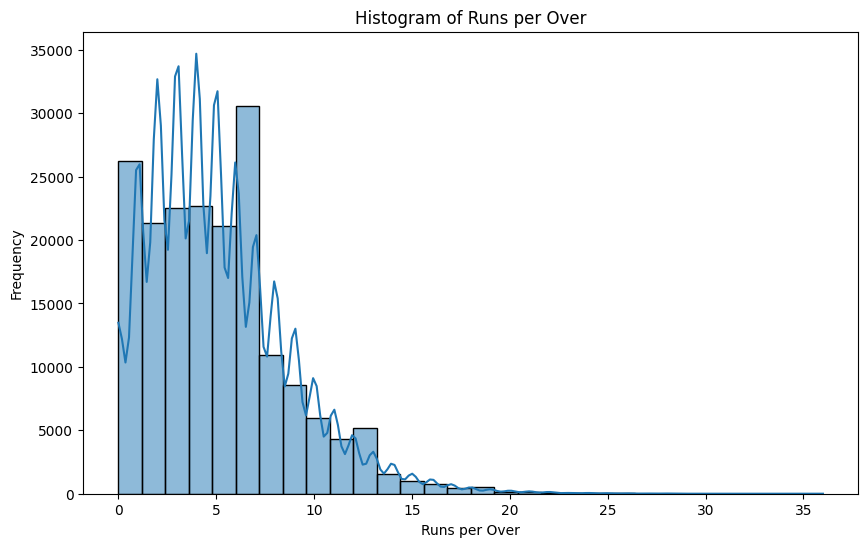

In [50]:
#histogram of total runs in every over
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for runs.total
plt.figure(figsize=(10,6))
sns.histplot(df_over['runs.total'], bins=30, kde=True)
plt.title('Histogram of Runs per Over')
plt.xlabel('Runs per Over')
plt.ylabel('Frequency')
plt.show()


This is not a normal distribution,the data is skewed towards the left and is multimodal.

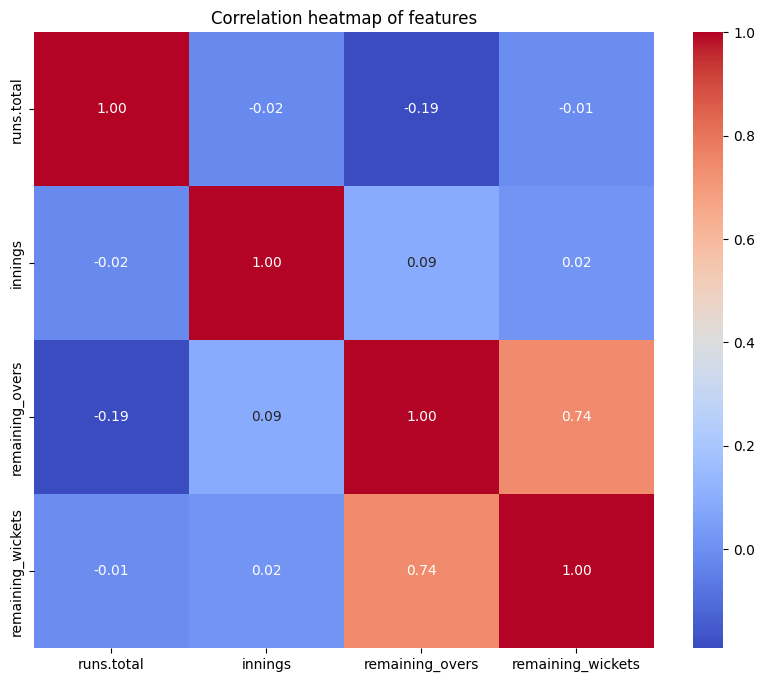

In [51]:
#correlation plot

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_over[['runs.total', 'innings', 'remaining_overs', 'remaining_wickets']].corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.title('Correlation heatmap of features')
plt.show()



No clear indication of any particular variable (innings, remaining_overs, remaining_wickets) being particulary correlated with total runs. The remaining wickets and remainings overs columns seem to have significant correlation, but I would not remove any one of them for now.

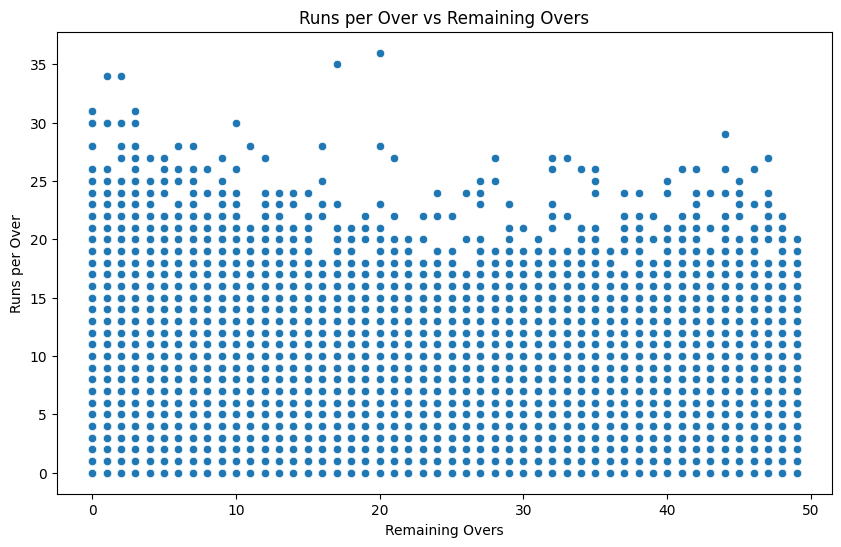

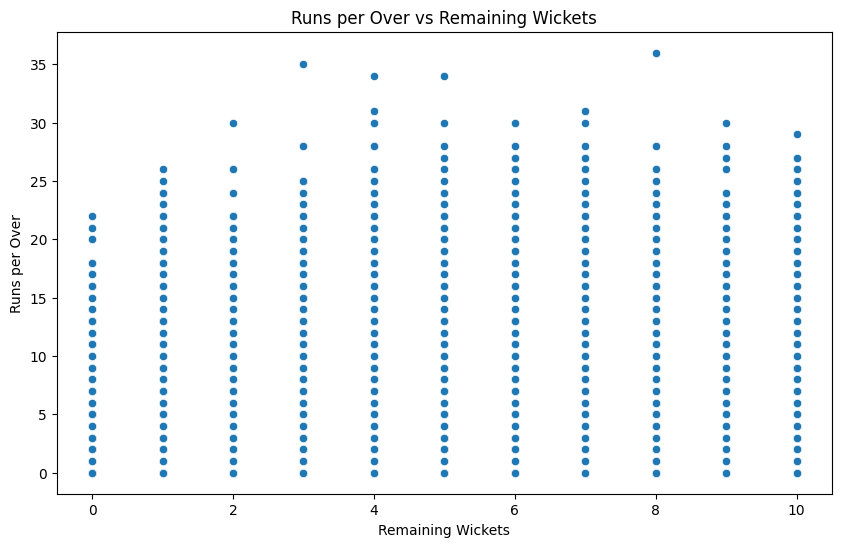

In [52]:
# Scatterplot of runs.total vs remaining_overs
plt.figure(figsize=(10,6))
sns.scatterplot(x='remaining_overs', y='runs.total', data=df_over)
plt.title('Runs per Over vs Remaining Overs')
plt.xlabel('Remaining Overs')
plt.ylabel('Runs per Over')
plt.show()

# Scatterplot of runs.total vs remaining_wickets
plt.figure(figsize=(10,6))
sns.scatterplot(x='remaining_wickets', y='runs.total', data=df_over)
plt.title('Runs per Over vs Remaining Wickets')
plt.xlabel('Remaining Wickets')
plt.ylabel('Runs per Over')
plt.show()

None of the features seem to have a non-linear relationship with the target variable

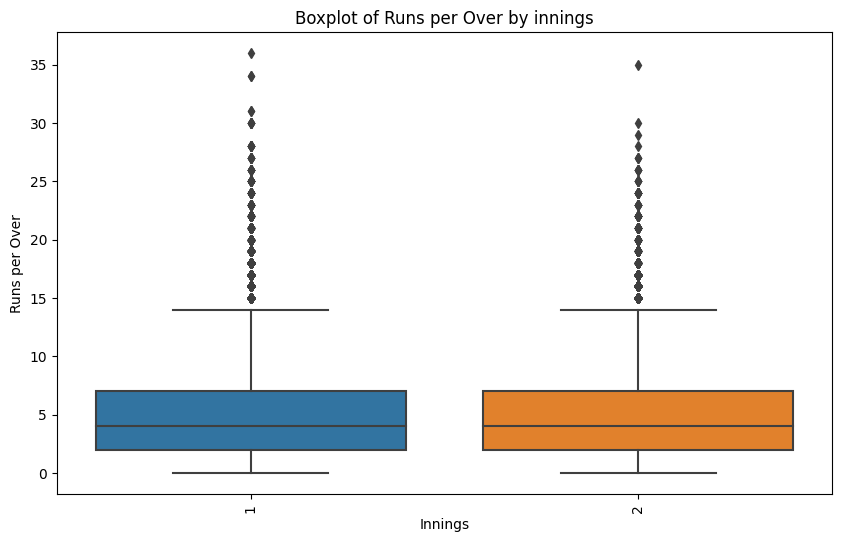

In [53]:
# Boxplot of runs.total by innings
plt.figure(figsize=(10,6))
sns.boxplot(x='innings', y='runs.total', data=df_over)
plt.title('Boxplot of Runs per Over by innings')
plt.xlabel('Innings')
plt.ylabel('Runs per Over')
plt.xticks(rotation=90)
plt.show()


In [54]:
from scipy.stats import mannwhitneyu

# Select the 'runs.total' values for the two teams you want to compare
innings_1_runs = df_over[df_over['innings'] == 1]['runs.total']
innings_2_runs = df_over[df_over['innings'] == 2]['runs.total']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(innings_1_runs, innings_2_runs)

print(f'Mann-Whitney U test p-value: {p}')


Mann-Whitney U test p-value: 3.7590243555201632e-06


Since the p-value is significantly smaller than 0.05 (a commonly used significance level), we can reject the null hypothesis and conclude that there is a statistically significant difference in the distributions of 'runs.total' for the two innings. This means that innings could be an important predictor for the model



Creating non-linear models with features - innings, remaining wickets and remaining overs to predict the target variable of total runs per over

Polynomial regression

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Defining the feature set X and the target y
X = df_over[['innings', 'remaining_overs', 'remaining_wickets']]
y = df_over['runs.total']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X

,innings,remaining_overs,remaining_wickets
0,1,49,10.0
1,1,48,10.0
2,1,47,10.0
3,1,46,10.0
4,1,45,10.0
...,...,...,...
184782,2,11,2.0
184783,2,10,2.0
184784,2,9,2.0
184785,2,8,1.0


In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

# Fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predicting on the training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# Predicting on the test data-set
y_test_predict = poly_model.predict(X_test_poly)

# Calculate the RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print(f'Root Mean Squared Error (Train set, Polynomial Regression): {rmse_train}')
print(f'Root Mean Squared Error (Test set, Polynomial Regression): {rmse_test}')

# Calculate the MAE
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predict)
print(f'Mean Absolute Error (Train set, Polynomial Regression): {mae_train}')
print(f'Mean Absolute Error (Test set, Polynomial Regression): {mae_test}')

# Calculate the R^2 score
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predict)
print(f'R^2 Score (Train set, Polynomial Regression): {r2_train}')
print(f'R^2 Score (Test set, Polynomial Regression): {r2_test}')

Root Mean Squared Error (Train set, Polynomial Regression): 3.380675890505586
Root Mean Squared Error (Test set, Polynomial Regression): 3.401280555293729
Mean Absolute Error (Train set, Polynomial Regression): 2.6372536273163867
Mean Absolute Error (Test set, Polynomial Regression): 2.648800416684561
R^2 Score (Train set, Polynomial Regression): 0.10247195326375813
R^2 Score (Test set, Polynomial Regression): 0.1003505866546881


Random forest regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
# Predicting on the test set
y_pred_forest = forest.predict(X_test)

# Calculating the RMSE
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f'Root Mean Squared Error (Random Forest): {rmse_forest}')

# Calculating the MAE
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print(f'Mean Absolute Error (Random Forest): {mae_forest}')

# Calculating the R^2 score
r2_forest = r2_score(y_test, y_pred_forest)
print(f'R^2 Score (Random Forest): {r2_forest}')

Root Mean Squared Error (Random Forest): 3.356541691420904
Mean Absolute Error (Random Forest): 2.6116421461636623
R^2 Score (Random Forest): 0.12386207401423677


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameters for exploration
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search (this will take some time)
grid_search.fit(X_train, y_train)

# View the best parameters from the fit
print(grid_search.best_params_)

# We can now use the best estimator to make predictions
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [62]:
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (Random Forest): {rmse_forest}')

# Calculating the MAE
mae_forest = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (Random Forest): {mae_forest}')

# Calculating the R^2 score
r2_forest = r2_score(y_test, y_pred)
print(f'R^2 Score (Random Forest): {r2_forest}')

Root Mean Squared Error (Random Forest): 3.351547780533525
Mean Absolute Error (Random Forest): 2.606125935866615
R^2 Score (Random Forest): 0.12646719575655307


In [63]:
!pip install xgboost lightgbm catboost

XGBoost regression

In [120]:
import xgboost as xgb

# Instantiate an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Use the model to predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [121]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'Root Mean Squared Error (XGboost): {rmse_xgb}')

# Calculate the MAE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error (XGboost): {mae_xgb}')

# Calculate the R^2 score
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'R^2 Score (XGboost): {r2_xgb}')

Root Mean Squared Error (XGboost): 3.353754560786025
Mean Absolute Error (XGboost): 2.609393791194691
R^2 Score (XGboost): 0.12531648587525968


LightGBM

In [122]:
import lightgbm as lgb

# Instantiate a LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Fit the model to the training data
lgb_model.fit(X_train, y_train)

# Use the model to predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

In [123]:
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print(f'Root Mean Squared Error (LGB): {rmse_lgb}')

# Calculate the MAE
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
print(f'Mean Absolute Error (LGB): {mae_lgb}')

# Calculate the R^2 score
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'R^2 Score (LGB): {r2_lgb}')

Root Mean Squared Error (LGB): 3.3479205425877248
Mean Absolute Error (LGB): 2.6044625911823167
R^2 Score (LGB): 0.12835694757818195


Catboost

In [68]:
import catboost as cb

# Instantiate a CatBoost model
cb_model = cb.CatBoostRegressor(random_state=42, verbose=False)

# Fit the model to the training data
cb_model.fit(X_train, y_train)

# Use the model to predict on the test set
y_pred_cb = cb_model.predict(X_test)

In [124]:
rmse_cb = np.sqrt(mean_squared_error(y_test, y_pred_cb))
print(f'Root Mean Squared Error (Catboost): {rmse_cb}')

# Calculate the MAE
mae_cb = mean_absolute_error(y_test, y_pred_cb)
print(f'Mean Absolute Error (Catboost): {mae_cb}')

# Calculate the R^2 score
r2_cb = r2_score(y_test, y_pred_cb)
print(f'R^2 Score (Catboost): {r2_cb}')

Root Mean Squared Error (Catboost): 3.350135292474529
Mean Absolute Error (Catboost): 2.6064619110217215
R^2 Score (Catboost): 0.12720333006577111


Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3)

In [125]:
y_pred_dt = tree.predict(X_test)

# Calculate the RMSE
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Root Mean Squared Error (Decision tree): {rmse_dt}')

# Calculate the MAE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f'Mean Absolute Error (Decision tree): {mae_dt}')

# Calculate the R^2 score
r2_dt = r2_score(y_test, y_pred_dt)
print(f'R^2 Score (Decision tree): {r2_dt}')

Root Mean Squared Error (Decision tree): 3.4294693849418434
Mean Absolute Error (Decision tree): 2.6647600627530488
R^2 Score (Decision tree): 0.08537672485150649


KNN Regression

In [72]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [73]:
y_pred_knn = knn.predict(X_test)

# Calculate the RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f'Root Mean Squared Error (KNN): {rmse_knn}')

# Calculate the MAE
mae_knn= mean_absolute_error(y_test, y_pred_knn)
print(f'Mean Absolute Error (KNN): {mae_knn}')

# Calculate the R^2 score
r2_knn = r2_score(y_test, y_pred_knn)
print(f'R^2 Score (Gradient KNN): {r2_knn}')

Root Mean Squared Error (KNN): 3.66377757740429
Mean Absolute Error (KNN): 2.842222644273815
R^2 Score (Gradient KNN): -0.04387041553125548


Neural Networks

In [80]:
from keras.models import Sequential
from keras.layers import Dense

# Define model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu')) # Input layer
model.add(Dense(16, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs= 20, batch_size=50, verbose=0)

# Predicting on the test set
y_pred_nn = model.predict(X_test)

# Since the output of the model is a 2D array and y_test is a 1D array,
# we need to flatten y_pred_nn to calculate RMSE, MAE and R^2
y_pred_nn = y_pred_nn.flatten()

# Calculate the RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')

# Calculate the MAE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'Mean Absolute Error (Neural Network): {mae_nn}')

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R^2 Score (Neural Network): {r2_nn}')


1152/1152 [==============================] - 1s 1ms/step
Root Mean Squared Error (Neural Network): 3.3519965849024045
Mean Absolute Error (Neural Network): 2.6218208022852076
R^2 Score (Neural Network): 0.12623323126379227


Ans.4

In [84]:
# Save your model
model.save('/content/my_model/model/my_model.h5')

In [82]:
import os

# List of subdirectories to be created within the main directory
sub_dirs = ['lib', 'data', 'model']

# Define the main directory
main_dir = "my_model"

# Check if the main directory exists. If not, create it.
if not os.path.exists(main_dir):
    os.makedirs(main_dir)

# Loop over the subdirectories and create them inside the main directory
for dir_name in sub_dirs:
    dir_path = os.path.join(main_dir, dir_name)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)


In [85]:
df_over.to_csv('/content/my_model/data/intermediate_data.csv', index=False)

In [91]:
ireland_data = pd.read_csv('/content/my_model/data/filtered_data.csv')

In [93]:
ireland_data

,matchid,innings,team,over,runs.total,remaining_overs,remaining_wickets
0,225171.0,2,Ireland,1,10,49,9.0
1,225171.0,2,Ireland,2,2,48,9.0
2,225171.0,2,Ireland,3,9,47,9.0
3,225171.0,2,Ireland,4,4,46,9.0
4,225171.0,2,Ireland,5,5,45,9.0
...,...,...,...,...,...,...,...
645,1251964.0,1,Ireland,1,0,49,9.0
646,1251964.0,1,Ireland,2,1,48,9.0
647,1251964.0,1,Ireland,3,5,47,8.0
648,1251964.0,1,Ireland,4,7,46,8.0


In [95]:
!bash /content/my_model/lib/run_model.sh

2023-06-28 01:39:01.559492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-28 01:39:04.104925: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
21/21 [==============================] - 1s 1ms/step
[3.9524024 4.0966787 4.2255373 4.362528  4.5614743 3.3819296 3.526206
 3.6704826 3.8099115 3.9742155 4.785822  4.9864054 5.143342  4.362528
 4.5614743 4.196927  3.526206  3.6704826 3.8099115 3.9742155 3.9524024
 4.0966787 4.2255373 3.767806  3.9120827 4.196927  4.3975096 3.6704826
 3.8099115 3.9742155 4.785822  4.0966787 4.2255373 4.362528  4.5614743
 3.3819296 3.526206  3.6704826 2.8479247 2.878017  4.196927  4.3975096
 4.598093  4.798676  4.9992595 4.196927  4.3975096 4.598093  4.798676
 4.9992595 4.196927  4.3975096 4.598093  4.798676  3.9742155 4.785822
 4.9864054 5.143342  5.286207  5.429072  4.

In [103]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Load the dataframe (assuming df_over is your DataFrame)
# df_over = pd.read_csv('your_dataframe.csv')

# Calculate cumulative runs
df_over['cumulative_runs'] = df_over.groupby(['matchid', 'innings'])['runs.total'].cumsum()

# One-hot encode the 'team' feature
encoder = OneHotEncoder(sparse=False)
team_encoded = pd.DataFrame(encoder.fit_transform(df_over[['team']]))

# Get feature names after one-hot encoding
team_encoded.columns = encoder.get_feature_names_out(['team'])

# Concatenate the original dataframe with the one-hot encoded 'team' feature dataframe
df_over = pd.concat([df_over, team_encoded], axis=1)

# Check for NaN values in the dataframe and handle them
if df_over.isnull().values.any():
    print("There are NaN values in the DataFrame. These need to be handled before proceeding.")

    # Remove NaN values. Uncomment the following line to use this option.
    df_over.dropna(inplace=True)

    df_over.fillna(df_over.mean(), inplace=True)

# Define the feature set X and the target y
X = df_over[['innings', 'remaining_overs', 'remaining_wickets', 'cumulative_runs'] + list(team_encoded.columns)]
y = df_over['runs.total']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print metrics
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


There are NaN values in the DataFrame. These need to be handled before proceeding.


<ipython-input-103-c20843b34607>:31: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_over.fillna(df_over.mean(), inplace=True)


RMSE: 3.275434548566657
MAE: 2.55301589306066
R^2: 0.16104335800497416


In [96]:
!zip -r my_model.zip /content/my_model/

  adding: content/my_model/ (stored 0%)
  adding: content/my_model/.ipynb_checkpoints/ (stored 0%)
  adding: content/my_model/model/ (stored 0%)
  adding: content/my_model/model/my_model.h5 (deflated 74%)
  adding: content/my_model/lib/ (stored 0%)
  adding: content/my_model/lib/.ipynb_checkpoints/ (stored 0%)
  adding: content/my_model/lib/predict.py (deflated 52%)
  adding: content/my_model/lib/run_model.sh (deflated 39%)
  adding: content/my_model/lib/filter_data.py (deflated 41%)
  adding: content/my_model/data/ (stored 0%)
  adding: content/my_model/data/intermediate_data.csv (deflated 86%)
  adding: content/my_model/data/filtered_data.csv (deflated 86%)


In [99]:
from google.colab import files
files.download("/content/my_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EXTRA

In [76]:
from keras.layers import Dropout, BatchNormalization

# Define model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu')) # Another Hidden layer
model.add(Dropout(0.5))
model.add(Dense(1)) # Output layer

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs= 20, batch_size=50, verbose=0)

# Predicting on the test set
y_pred_nn = model.predict(X_test)

# Since the output of the model is a 2D array and y_test is a 1D array,
# we need to flatten y_pred_nn to calculate RMSE, MAE and R^2
y_pred_nn = y_pred_nn.flatten()

# Calculate the RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')

# Calculate the MAE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'Mean Absolute Error (Neural Network): {mae_nn}')

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R^2 Score (Neural Network): {r2_nn}')



1152/1152 [==============================] - 2s 1ms/step
Root Mean Squared Error (Neural Network): 3.377455848277
Mean Absolute Error (Neural Network): 2.644499928382596
R^2 Score (Neural Network): 0.11290986551820037


In [77]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Define model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu')) # Another Hidden layer
model.add(Dropout(0.5))
model.add(Dense(1)) # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mae'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=20, batch_size=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

y_pred_nn = model.predict(X_test)

# Since the output of the model is a 2D array and y_test is a 1D array,
# we need to flatten y_pred_nn to calculate RMSE, MAE and R^2
y_pred_nn = y_pred_nn.flatten()

# Calculate the RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')

# Calculate the MAE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'Mean Absolute Error (Neural Network): {mae_nn}')

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R^2 Score (Neural Network): {r2_nn}')

1152/1152 [==============================] - 2s 1ms/step
Root Mean Squared Error (Neural Network): 3.389361602962053
Mean Absolute Error (Neural Network): 2.6485817520896013
R^2 Score (Neural Network): 0.10664473996069523


In [78]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Define model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu')) # Another Hidden layer
model.add(Dropout(0.5))
model.add(Dense(1)) # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=20, batch_size=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

y_pred_nn = model.predict(X_test)

# Since the output of the model is a 2D array and y_test is a 1D array,
# we need to flatten y_pred_nn to calculate RMSE, MAE and R^2
y_pred_nn = y_pred_nn.flatten()

# Calculate the RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')

# Calculate the MAE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'Mean Absolute Error (Neural Network): {mae_nn}')

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R^2 Score (Neural Network): {r2_nn}')

1152/1152 [==============================] - 2s 1ms/step
Root Mean Squared Error (Neural Network): 3.4081426014927656
Mean Absolute Error (Neural Network): 2.6922427796113024
R^2 Score (Neural Network): 0.09671685920622763


In [79]:
from keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Define model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer
model.add(BatchNormalization())
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu')) # Another Hidden layer
model.add(Dropout(0.5))
model.add(Dense(1)) # Output layer

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=20, batch_size=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

y_pred_nn = model.predict(X_test)

# Since the output of the model is a 2D array and y_test is a 1D array,
# we need to flatten y_pred_nn to calculate RMSE, MAE and R^2
y_pred_nn = y_pred_nn.flatten()

# Calculate the RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f'Root Mean Squared Error (Neural Network): {rmse_nn}')

# Calculate the MAE
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f'Mean Absolute Error (Neural Network): {mae_nn}')

# Calculate the R^2 score
r2_nn = r2_score(y_test, y_pred_nn)
print(f'R^2 Score (Neural Network): {r2_nn}')

1152/1152 [==============================] - 2s 1ms/step
Root Mean Squared Error (Neural Network): 3.3813866590452846
Mean Absolute Error (Neural Network): 2.6190483066830423
R^2 Score (Neural Network): 0.11084380588552911


EXTRA

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from joblib import load

In [ ]:
# Save a pandas dataframe to a csv file in the 'data' folder
df_over.to_csv('/content/my_model/data/intermediate_data.csv', index=False)

# Save the trained model to a file in the 'model' folder
dump(model, 'my_model/model/linear_regression_model.joblib')

# To load the model from the file
model = load('my_model/model/linear_regression_model.joblib')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

df_over = pd.read_csv('/content/my_model/data/intermediate_data.csv')

X = df_over[['remaining_overs', 'remaining_wickets']]
y = df_over['runs.total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

dump(model, '/content/my_model/model/linear_regression_model.joblib')


['/content/my_model/model/linear_regression_model.joblib']

In [ ]:
os.getcwd()

'/content'

In [ ]:
new_dir = '/content/my_model'

In [ ]:
os.chdir(new_dir)

In [ ]:
os.getcwd()

'/content/my_model'

In [ ]:
!bash run.sh

Training model...
Making predictions...
[3.58767586 3.69385917 3.80004248 3.9062258  4.01240911 3.58767586
 3.69385917 3.80004248 3.9062258  4.01240911 4.0172581  4.12344141
 4.22962473 3.9062258  4.01240911 4.0172581  3.69385917 3.80004248
 3.9062258  4.01240911 3.58767586 3.69385917 3.80004248 3.47664355
 3.58282687 4.0172581  4.12344141 3.80004248 3.9062258  4.01240911
 4.0172581  3.69385917 3.80004248 3.9062258  4.01240911 3.58767586
 3.69385917 3.80004248 3.04706131 2.72366238 4.0172581  4.12344141
 4.22962473 4.33580804 4.44199135 4.0172581  4.12344141 4.22962473
 4.33580804 4.44199135 4.0172581  4.12344141 4.22962473 4.33580804
 4.01240911 4.0172581  4.12344141 4.22962473 4.33580804 4.44199135
 4.0172581  4.12344141 4.22962473 4.33580804 4.44199135 4.0172581
 4.12344141 4.22962473 4.33580804 4.01240911 4.0172581  4.12344141
 3.80004248 3.9062258  3.58282687 4.0172581  3.69385917 3.80004248
 3.47664355 3.58282687 4.0172581  4.12344141 4.22962473 4.33580804
 4.44199135 4.0172581  